In [2]:
!pip install mlxtend

In [3]:
%pwd /Desktop/DIC



'/Users/sonalidarapu/Desktop/DIC'

In [4]:
import numpy as np
import pandas as pd
import mlxtend
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_NEO = pd.read_csv('export_dataframe.csv')


In [6]:
col = df_NEO.pop("hazardous")

In [7]:
df_NEO.insert(10,'hazardous',col)

#Basic Data reading and understanding data


In [8]:
df_NEO.head(10)

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,Earth,False,1900-Feb-04 06:16 ± 3_02:30,4.058569e+07,34297.587778,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,Earth,False,1900-Feb-05 22:08 ± < 00:01,2.906912e+07,27529.472307,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,Earth,False,1900-Feb-05 23:42 ± < 00:01,5.511502e+07,57544.470083,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,Earth,False,1900-Feb-10 05:07 ± 00:02,6.903598e+07,56625.210122,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,Earth,False,1900-Feb-10 17:56 ± 9_08:41,3.835526e+07,48425.840329,22.00,False


In [9]:
df_NEO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        40000 non-null  int64  
 1   name                      40000 non-null  object 
 2   est_diameter_min          40000 non-null  float64
 3   est_diameter_max          40000 non-null  float64
 4   orbiting_body             40000 non-null  object 
 5   sentry_object             40000 non-null  bool   
 6   Close-Approach (CA) Date  40000 non-null  object 
 7   miss_distance             39798 non-null  float64
 8   relative_velocity         39695 non-null  float64
 9   absolute_magnitude        39840 non-null  float64
 10  hazardous                 40000 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 2.8+ MB


In [10]:
# summary statistics of the data

In [11]:
df_NEO.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,1.129585e+07,1.846201e+07,2.000433e+06,3.299914e+06,3.621612e+06,3.827320e+06,5.427586e+07
est_diameter_min,40000.0,1.482702e-01,3.585850e-01,6.089126e-04,2.140696e-02,6.089126e-02,1.756123e-01,3.789265e+01
est_diameter_max,40000.0,3.315423e-01,8.018205e-01,1.361570e-03,4.786742e-02,1.361570e-01,3.926811e-01,8.473054e+01
miss_distance,39798.0,4.079501e+07,2.098205e+07,1.185167e+04,2.390998e+07,4.237677e+07,5.902371e+07,7.449941e+07
relative_velocity,39695.0,4.938502e+04,2.453765e+04,5.616956e+02,3.014307e+04,4.635959e+04,6.481951e+04,1.299852e+05
absolute_magnitude,39840.0,2.316739e+01,2.924832e+00,9.230000e+00,2.090000e+01,2.320000e+01,2.540000e+01,3.030000e+01


In [12]:
numeric_features = df_NEO.select_dtypes(include = [np.number])

In [13]:
numeric_features.columns

Index(['id', 'est_diameter_min', 'est_diameter_max', 'miss_distance',
       'relative_velocity', 'absolute_magnitude'],
      dtype='object')

In [14]:
numeric_features.corr()

,id,est_diameter_min,est_diameter_max,miss_distance,relative_velocity,absolute_magnitude
id,1.000000,-0.124501,-0.124501,0.066135,-0.014315,0.262976
est_diameter_min,-0.124501,1.000000,1.000000,0.090710,0.175492,-0.526919
est_diameter_max,-0.124501,1.000000,1.000000,0.090710,0.175492,-0.526919
miss_distance,0.066135,0.090710,0.090710,1.000000,0.314127,-0.165961
relative_velocity,-0.014315,0.175492,0.175492,0.314127,1.000000,-0.321252
absolute_magnitude,0.262976,-0.526919,-0.526919,-0.165961,-0.321252,1.000000


<AxesSubplot:>

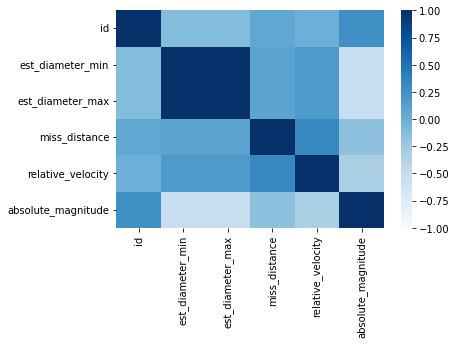

In [15]:
sns.heatmap(numeric_features.corr(),vmin =-1,vmax = 1,cmap = 'Blues')

In [16]:
#Data cleaning

In [17]:
#Handling missing values

In [18]:
missing_values_count = df_NEO.isnull().sum()

In [19]:
missing_values_count[:]

id                            0
name                          0
est_diameter_min              0
est_diameter_max              0
orbiting_body                 0
sentry_object                 0
Close-Approach (CA) Date      0
miss_distance               202
relative_velocity           305
absolute_magnitude          160
hazardous                     0
dtype: int64

In [20]:
 # see what percentage of values are missing 
    

In [21]:
total_cells = np.product(df_NEO.shape)

In [22]:
missing = missing_values_count.sum()

In [23]:
(missing/total_cells)*100

0.1515909090909091

In [24]:
# replace missing values with what comes after it in the same column

In [25]:
df_NEO['miss_distance'].fillna(method = 'bfill', inplace = True)

In [26]:
df_NEO['relative_velocity'].fillna(method = 'bfill', inplace = True)

In [27]:
df_NEO['absolute_magnitude'].fillna(method = 'bfill', inplace = True)

In [28]:
df_NEO.isnull().sum()

id                          0
name                        0
est_diameter_min            0
est_diameter_max            0
orbiting_body               0
sentry_object               0
Close-Approach (CA) Date    0
miss_distance               0
relative_velocity           0
absolute_magnitude          0
hazardous                   0
dtype: int64

In [29]:
df_NEO.head(10)

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,Earth,False,1900-Feb-04 06:16 ± 3_02:30,4.058569e+07,34297.587778,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,Earth,False,1900-Feb-05 22:08 ± < 00:01,2.906912e+07,27529.472307,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,Earth,False,1900-Feb-05 23:42 ± < 00:01,5.511502e+07,57544.470083,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,Earth,False,1900-Feb-10 05:07 ± 00:02,6.903598e+07,56625.210122,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,Earth,False,1900-Feb-10 17:56 ± 9_08:41,3.835526e+07,48425.840329,22.00,False


In [30]:
data = df_NEO[['est_diameter_min','relative_velocity', 'absolute_magnitude']] 

In [31]:
data.head()

,est_diameter_min,relative_velocity,absolute_magnitude
0,1.198271,13569.249224,16.73
1,0.265800,73588.726663,20.00
2,0.722030,114258.692129,17.83
3,0.096506,24764.303138,22.20
4,0.255009,42737.733765,20.09


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=['est_diameter_min','relative_velocity','absolute_magnitude'])
scaled_data.head()

,est_diameter_min,relative_velocity,absolute_magnitude
0,0.031607,0.100504,0.355956
1,0.006999,0.564248,0.511153
2,0.019039,0.878488,0.408163
3,0.002531,0.187003,0.615567
4,0.006714,0.325876,0.515425


In [33]:
# to detect anomalies in the data, first check if the column is normally distributed


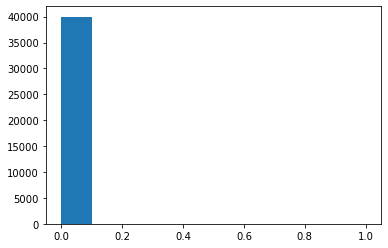

In [34]:
from matplotlib import pyplot
pyplot.hist(scaled_data['est_diameter_min'])
pyplot.show()

In [35]:
# perform univariate analysis on the data

In [36]:
df_NEO.dtypes

id                            int64
name                         object
est_diameter_min            float64
est_diameter_max            float64
orbiting_body                object
sentry_object                  bool
Close-Approach (CA) Date     object
miss_distance               float64
relative_velocity           float64
absolute_magnitude          float64
hazardous                      bool
dtype: object

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
df_NEO.head()

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,True


In [39]:
# drawing a scatterplot for est_diameter_min


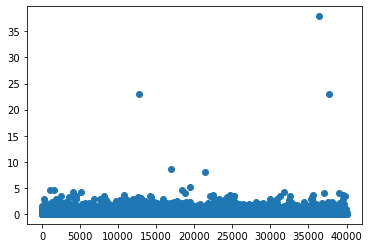

In [40]:
plt.scatter(df_NEO.index, df_NEO['est_diameter_min'])

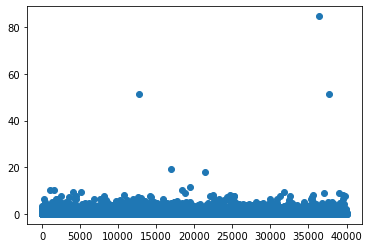

In [41]:
plt.scatter(df_NEO.index, df_NEO['est_diameter_max'])

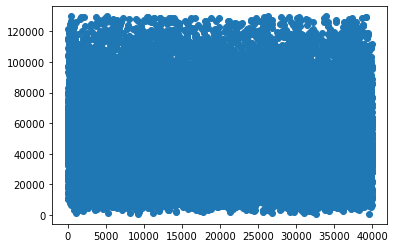

In [42]:
plt.scatter(df_NEO.index, df_NEO['relative_velocity'])

In [43]:
df_NEO['hazardous'].value_counts()

False    35365
True      4635
Name: hazardous, dtype: int64

In [44]:
df_NEO['hazardous'].value_counts(normalize = True)

False    0.884125
True     0.115875
Name: hazardous, dtype: float64

<AxesSubplot:>

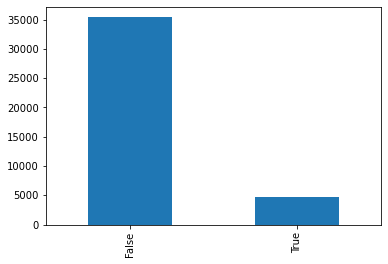

In [45]:
df_NEO['hazardous'].value_counts().plot.bar()

<AxesSubplot:>

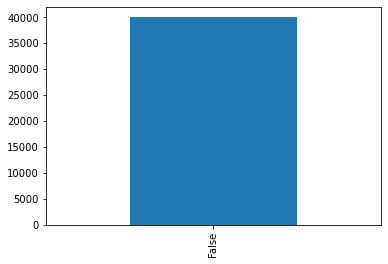

In [46]:
df_NEO['sentry_object'].value_counts().plot.bar()

In [47]:
print(df_NEO.nunique())

id                          15719
name                        15719
est_diameter_min             1390
est_diameter_max             1390
orbiting_body                   1
sentry_object                   1
Close-Approach (CA) Date    31198
miss_distance               39695
relative_velocity           39690
absolute_magnitude           1359
hazardous                       2
dtype: int64


In [48]:
#calculating median of columns and comparing it with mean to find out if the data is normally distributed or skewed

In [49]:
df_NEO.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,1.129585e+07,1.846201e+07,2.000433e+06,3.299914e+06,3.621612e+06,3.827320e+06,5.427586e+07
est_diameter_min,40000.0,1.482702e-01,3.585850e-01,6.089126e-04,2.140696e-02,6.089126e-02,1.756123e-01,3.789265e+01
est_diameter_max,40000.0,3.315423e-01,8.018205e-01,1.361570e-03,4.786742e-02,1.361570e-01,3.926811e-01,8.473054e+01
miss_distance,40000.0,4.080261e+07,2.097845e+07,1.185167e+04,2.392831e+07,4.238516e+07,5.902303e+07,7.449941e+07
relative_velocity,40000.0,4.938134e+04,2.454829e+04,5.616956e+02,3.013684e+04,4.635753e+04,6.481940e+04,1.299852e+05
absolute_magnitude,40000.0,2.316766e+01,2.926833e+00,9.230000e+00,2.090000e+01,2.320000e+01,2.540000e+01,3.030000e+01


In [50]:
df_NEO['est_diameter_min'].median()

0.0608912622

In [51]:
df_NEO['est_diameter_max'].median()

0.1361570015

In [52]:
df_NEO['miss_distance'].median()

42385162.38054554

In [53]:
df_NEO['absolute_magnitude'].median()

23.2

In [54]:
df_NEO.describe(include=['O'])

,name,orbiting_body,Close-Approach (CA) Date
count,40000,40000,40000
unique,15719,1,31198
top,469219 Kamo`oalewa (2016 HO3),Earth,1900-Jan-04 22:25 ± 00:02
freq,24,40000,2


In [55]:
# confirming that est_diameter_min is right skewed


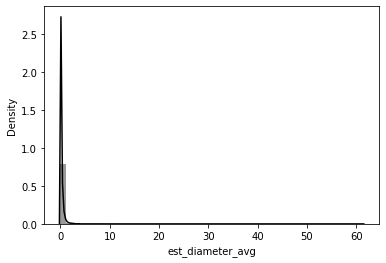

In [72]:
sns.distplot(df_NEO.est_diameter_avg,color='black')
plt.show()

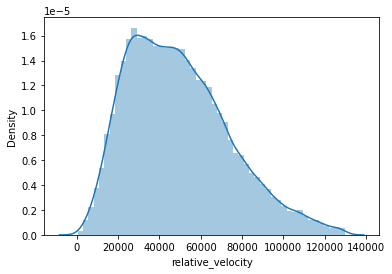

In [60]:
sns.distplot(df_NEO.relative_velocity)
plt.show()

In [61]:
#Feature engineering to find out the avg diameter

In [65]:
df_NEO['est_diameter_avg']=(df_NEO.est_diameter_max+df_NEO.est_diameter_min)/2

In [66]:
df_NEO.head(10)

,id,name,est_diameter_min,est_diameter_max,orbiting_body,sentry_object,Close-Approach (CA) Date,miss_distance,relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,2162635,162635 (2000 SS164),1.198271,2.679415,Earth,False,1900-Jan-04 22:25 ± 00:02,5.483974e+07,13569.249224,16.73,False,1.938843
1,2277475,277475 (2005 WK4),0.265800,0.594347,Earth,False,1900-Jan-11 01:07 ± 00:18,6.143813e+07,73588.726663,20.00,True,0.430073
2,2512244,512244 (2015 YE18),0.722030,1.614507,Earth,False,1900-Jan-12 23:07 ± 00:13,4.979872e+07,114258.692129,17.83,False,1.168268
3,3596030,(2012 BV13),0.096506,0.215794,Earth,False,1900-Jan-29 18:13 ± 00:24,2.543497e+07,24764.303138,22.20,False,0.156150
4,3667127,(2014 GE35),0.255009,0.570217,Earth,False,1900-Feb-04 03:50 ± 14:49,4.627557e+07,42737.733765,20.09,True,0.412613
5,54138696,(2021 GY23),0.036354,0.081291,Earth,False,1900-Feb-04 06:16 ± 3_02:30,4.058569e+07,34297.587778,24.32,False,0.058822
6,54189957,(2021 PY40),0.171615,0.383743,Earth,False,1900-Feb-05 22:08 ± < 00:01,2.906912e+07,27529.472307,20.95,False,0.277679
7,54230078,(2021 XD6),0.005328,0.011914,Earth,False,1900-Feb-05 23:42 ± < 00:01,5.511502e+07,57544.470083,28.49,False,0.008621
8,2088213,88213 (2001 AF2),0.350393,0.783502,Earth,False,1900-Feb-10 05:07 ± 00:02,6.903598e+07,56625.210122,19.40,False,0.566947
9,3766065,(2016 YM),0.105817,0.236614,Earth,False,1900-Feb-10 17:56 ± 9_08:41,3.835526e+07,48425.840329,22.00,False,0.171215


In [70]:
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df_NEO[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000
mean,0.148270,0.331542,49381.340496,4.080261e+07,23.167659
std,0.358585,0.801821,24548.290082,2.097845e+07,2.926833
min,0.000609,0.001362,561.695602,1.185167e+04,9.230000
25%,0.021407,0.047867,30136.836229,2.392831e+07,20.900000
50%,0.060891,0.136157,46357.531400,4.238516e+07,23.200000
75%,0.175612,0.392681,64819.401878,5.902303e+07,25.400000
max,37.892650,84.730541,129985.246736,7.449941e+07,30.300000


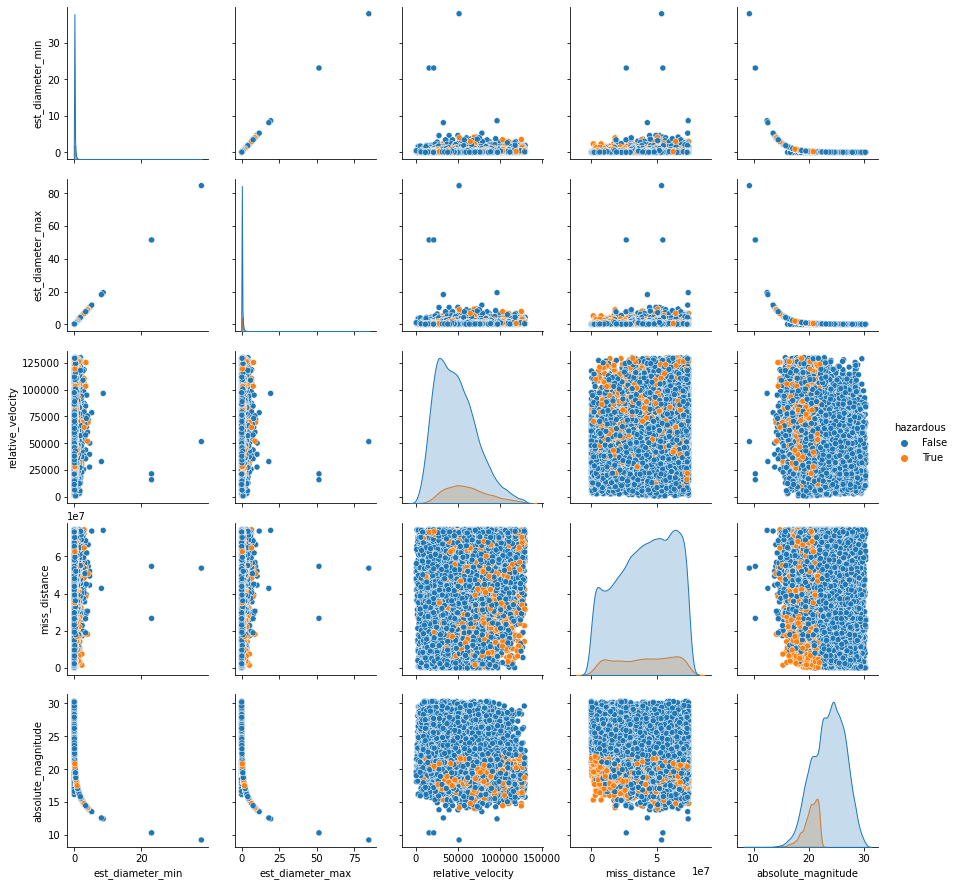

In [71]:
fig= sns.pairplot(df_NEO[numeric_df+['hazardous']],hue = 'hazardous')